##Question 1

Suppose we have a stimulus defined by a single variable called s. s can take one of two values, which we will call s1 and s2. You could think of these as lights flashing in the eyes at one of two possible frequencies. Or perhaps listening to punk rock vs. listening to Dvorak.

Let's call the firing rate response of a neuron to this stimulus r.

Suppose that under stimulus s1 the response rate of the neuron can be roughly approximated with a Gaussian distribution with the following parameters:

μ (mean): 5

σ (standard deviation): 0.5

And likewise for s2:

μ: 7

σ: 1


Hint: There are several functions available to help you evaluate Gaussian distributions. In Octave and in Matlab's stats toolbox you can use the 'normpdf' function. If you know how to set the problem up, you will be able to try all the answers below to find the one that works best. If you decide to challenge yourself to solve this algebraically instead, you can use the univariate Gaussian PDF, given at the top of this Wikipedia page.

In [67]:
%matplotlib inline

from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

### Punk Rock

In [68]:
rock_mu, rock_sigma = 5, 0.5
rock = np.random.normal(rock_mu, rock_sigma, 1000)

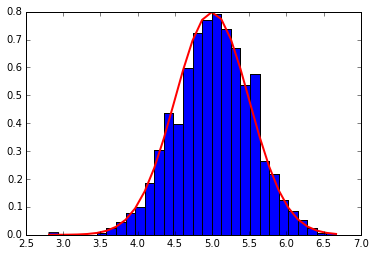

In [69]:
count, bins, ignored = plt.hist(rock, 30, normed=True)
plt.plot(bins, 
         1/(rock_sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - rock_mu)**2 / (2 * rock_sigma**2) ), 
         linewidth=2, color='r')
plt.show()

### Dvorak

In [70]:
dvorak_mu, dvorak_sigma = 7, 1
dvorak = np.random.normal(dvorak_mu, dvorak_sigma, 1000)

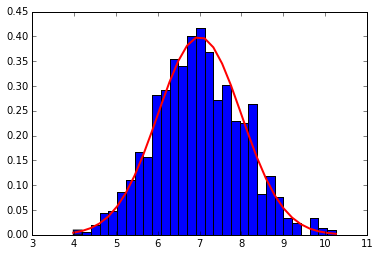

In [71]:
count, bins, ignored = plt.hist(dvorak, 30, normed=True)
plt.plot(bins, 
         1/(dvorak_sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - dvorak_mu)**2 / (2 * dvorak_sigma**2) ), 
         linewidth=2, color='r')
plt.show()

Lets say that both stimuli are equally likely and we are given no other prior information.

Now let's throw in another twist. Let's say that we receive a measurement of the neuron's response and want to guess which stimulus was presented, but that to us, it is twice as bad to mistakenly think it is s2 than to mistakenly think it is s1.

Which of these firing rates would make the best decision threshold for us in determining the value of s given a neuron's firing rate?



In [72]:
def solve(m1,m2,std1,std2):
  a = 1/(2*std1**2) - 1/(2*std2**2)
  b = m2/(std2**2) - m1/(std1**2)
  c = m1**2 /(2*std1**2) - m2**2 / (2*std2**2) - np.log(std2/std1)
  return np.roots([a,b,c])

In [59]:
penalty = 2
rock_mu *= penalty
rock_sigma *= penalty

result = solve(rock_mu,dvorak_mu,rock_sigma,dvorak_sigma)
print result

[ 3.+6.55743852j  3.-6.55743852j]


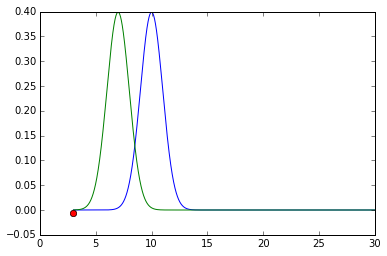

In [60]:
x = np.linspace(3,30,10000)
plot1=plt.plot(x,mlab.normpdf(x,rock_mu,rock_sigma))
plot2=plt.plot(x,mlab.normpdf(x,dvorak_mu,dvorak_sigma))
plot3=plt.plot(result,mlab.normpdf(result,rock_mu,rock_sigma),'o')

In [88]:
lower = min(min(rock), min(dvorak))
higher = max(max(rock), max(dvorak))

result = solve(rock_mu,dvorak_mu,rock_sigma,dvorak_sigma)

if(len(result)==0): # Completely overlapping 
    overlap = 0.0

elif(len(result)==1): # One point of contact
    r = result[0]
    if(m1>m2):
        tm,ts=m2,std2
        m2,std2=m1,std1
        m1,std1=tm,ts
    if(r<lower):
        overlap = (norm.cdf(upper,m1,std1)-norm.cdf(lower,m1,std1))
    elif(r<upper):
        overlap = (norm.cdf(r,m2,std2)-norm.cdf(lower,m2,std2))+(norm.cdf(upper,m1,std1)-norm.cdf(r,m1,std1))
    else:
        overlap = (norm.cdf(upper,m2,std2)-norm.cdf(lower,m2,std2))

elif(len(result)==2): # Two points of contact
    r1 = result[0]
    r2 = result[1]
    if(r1>r2):
        temp=r2
        
print result

[ 3.25+1.4460036j  3.25-1.4460036j]


In [85]:
f=rock*2
g=dvorak


In [86]:
d = f - g
for i in range(len(d) - 1):
    if d[i] == 0. or d[i] * d[i + 1] < 0.:
        # crossover at i
        x_ = x[i]

In [87]:
x_

5.4653465346534649

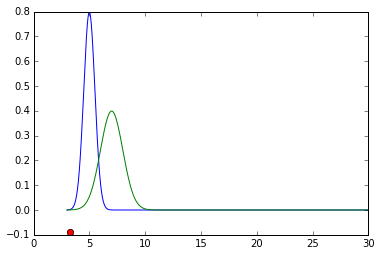

In [100]:
x = np.linspace(3,30,10000)
result = solve(rock_mu,dvorak_mu,rock_sigma,dvorak_sigma)
plot1=plt.plot(x,mlab.normpdf(x,rock_mu,rock_sigma))
plot2=plt.plot(x,mlab.normpdf(x,dvorak_mu,dvorak_sigma))
plot3=plt.plot(result,mlab.normpdf(result,rock_mu,rock_sigma),'o')
plt.show()